In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
num_files = len(os.listdir("./results_sum/output/"))
print(num_files)

24


# Tightness of bound

In [3]:
ToB_min = {}
ToB_median = {}
ToB_max = {}

In [4]:
for d in range(2, num_files//2 + 2):
    df = pd.read_csv(f"./results_sum/output/Alice={d},Bob={d}_Herm_df.csv")
    ToB_min[d] = df["ToB"].min()
    ToB_median[d] = df["ToB"].median()
    ToB_max[d] = df["ToB"].max()

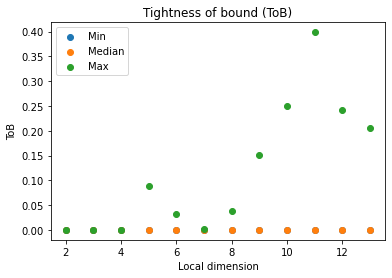

In [5]:
plt.scatter(ToB_min.keys(), ToB_min.values())
plt.scatter(ToB_median.keys(), ToB_median.values())
plt.scatter(ToB_max.keys(), ToB_max.values())
plt.legend(["Min", "Median", "Max"])
plt.title("Tightness of bound (ToB)")
plt.xlabel("Local dimension")
plt.ylabel("ToB")
plt.show()

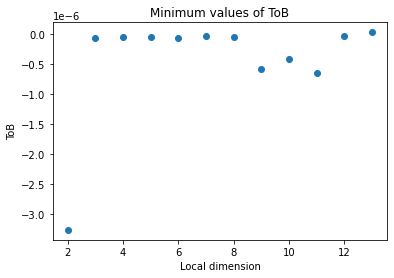

In [6]:
plt.scatter(ToB_min.keys(), ToB_min.values())
plt.title("Minimum values of ToB")
plt.xlabel("Local dimension")
plt.ylabel("ToB")
plt.show()

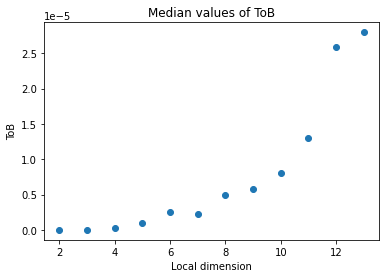

In [7]:
plt.scatter(ToB_median.keys(), ToB_median.values())
plt.title("Median values of ToB")
plt.xlabel("Local dimension")
plt.ylabel("ToB")
plt.show()

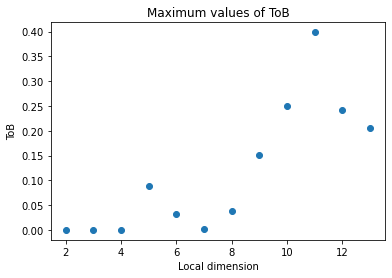

In [8]:
plt.scatter(ToB_max.keys(), ToB_max.values())
plt.title("Maximum values of ToB")
plt.xlabel("Local dimension")
plt.ylabel("ToB")
plt.show()

# Computation time

In [9]:
# Upper bounds
PPT = {}
realign = {}
SymExt = {}
BosExt = {}

# Lower bounds
MM = {}
MM_rev_1 = {}
MM_rev_2 = {}

US = {}
US_rev_1 = {}
US_rev_2 = {}

rand = {}
rand_rev_1 = {}
rand_rev_2 = {}

In [10]:
for d in range(2, num_files//2 + 2):
    df = pd.read_csv(f"./results_sum/output/Alice={d},Bob={d}_Herm_time_df.csv")
    
    # Upper bounds
    PPT[d] = df["beta_PPT"].median()
    realign[d] = df["beta_r"].median()
    SymExt[d] = df["beta_k"].median()
    BosExt[d] = df["beta_prime_k"].median()
    
    # Lower bounds
    MM[d] = df["gamma_MM"].median()
    MM_rev_1[d] = df["gamma_MM_rev_1"].median()
    MM_rev_2[d] = df["gamma_MM_rev_2"].median()
    
    US[d] = df["gamma_US"].median()
    US_rev_1[d] = df["gamma_US_rev_1"].median()
    US_rev_2[d] = df["gamma_US_rev_2"].median()
    
    rand[d] = df["gamma_rand"].median()/100
    rand_rev_1[d] = df["gamma_rand_rev_1"].median()/100
    rand_rev_2[d] = df["gamma_rand_rev_2"].median()/100

/home/ankithmo/anaconda3/envs/nss/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ankithmo/anaconda3/envs/nss/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


## Upper bounds

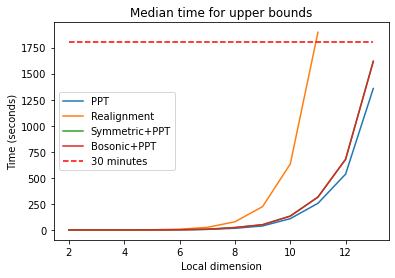

In [11]:
plt.plot(PPT.keys(), PPT.values())
plt.plot(realign.keys(), realign.values())
plt.plot(SymExt.keys(), SymExt.values())
plt.plot(BosExt.keys(), BosExt.values())
plt.plot(PPT.keys(), [1800]*len(PPT), 'r--')

plt.legend(["PPT", "Realignment", "Symmetric+PPT", "Bosonic+PPT", "30 minutes"])
plt.title("Median time for upper bounds")
plt.xlabel("Local dimension")
plt.ylabel("Time (seconds)")
plt.show()

#### Criteria to evaluate whether to discontinue an algorithm
When the median computation time for an algorithm is 30 minutes, we check if there is any advantage in the optimal value computed by this algorithm. [https://ankith-mohan.shinyapps.io/SEP_app/](https://ankith-mohan.shinyapps.io/SEP_app/)
If there is no significant advantage, we discontinue the algorithm.

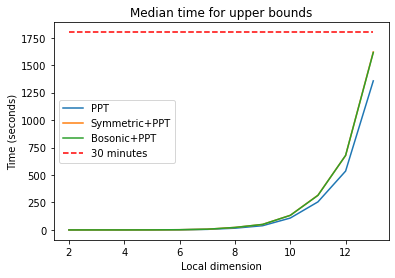

In [12]:
plt.plot(PPT.keys(), PPT.values())
plt.plot(SymExt.keys(), SymExt.values())
plt.plot(BosExt.keys(), BosExt.values())
plt.plot(PPT.keys(), [1800]*len(PPT), 'r--')

plt.legend(["PPT", "Symmetric+PPT", "Bosonic+PPT", "30 minutes"])
plt.title("Median time for upper bounds")
plt.xlabel("Local dimension")
plt.ylabel("Time (seconds)")
plt.show()

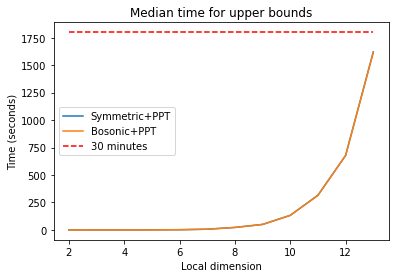

In [13]:
plt.plot(SymExt.keys(), SymExt.values())
plt.plot(BosExt.keys(), BosExt.values())
plt.plot(SymExt.keys(), [1800]*len(SymExt), 'r--')

plt.legend(["Symmetric+PPT", "Bosonic+PPT", "30 minutes"])
plt.title("Median time for upper bounds")
plt.xlabel("Local dimension")
plt.ylabel("Time (seconds)")
plt.show()

## Lower bounds

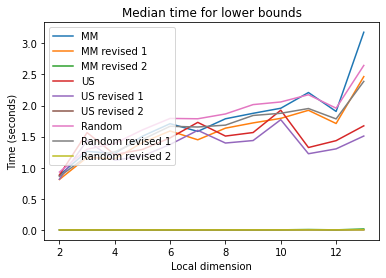

In [14]:
plt.plot(MM.keys(), MM.values())
plt.plot(MM_rev_1.keys(), MM_rev_1.values())
plt.plot(MM_rev_2.keys(), MM_rev_2.values())

plt.plot(US.keys(), US.values())
plt.plot(US_rev_1.keys(), US_rev_1.values())
plt.plot(US_rev_2.keys(), US_rev_2.values())

plt.plot(rand.keys(), rand.values())
plt.plot(rand_rev_1.keys(), rand_rev_1.values())
plt.plot(rand_rev_2.keys(), rand_rev_2.values())

plt.legend(["MM", "MM revised 1", "MM revised 2",
            "US", "US revised 1", "US revised 2",
            "Random", "Random revised 1", "Random revised 2"])
plt.title("Median time for lower bounds")
plt.xlabel("Local dimension")
plt.ylabel("Time (seconds)")
plt.show()

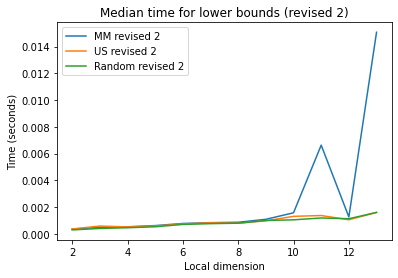

In [15]:
plt.plot(MM_rev_2.keys(), MM_rev_2.values())
plt.plot(US_rev_2.keys(), US_rev_2.values())
plt.plot(rand_rev_2.keys(), rand_rev_2.values())
plt.legend(["MM revised 2", "US revised 2", "Random revised 2"])
plt.title("Median time for lower bounds (revised 2)")
plt.xlabel("Local dimension")
plt.ylabel("Time (seconds)")
plt.show()

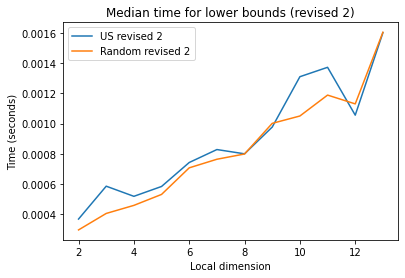

In [16]:
plt.plot(US_rev_2.keys(), US_rev_2.values())
plt.plot(rand_rev_2.keys(), rand_rev_2.values())
plt.legend(["US revised 2", "Random revised 2"])
plt.title("Median time for lower bounds (revised 2)")
plt.xlabel("Local dimension")
plt.ylabel("Time (seconds)")
plt.show()